# Analysis Of Olympic Data 

In [16]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt


In [17]:
df = pd.read_csv("summerolympics.csv")


In [18]:
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


## 1. In how many cities Summer Olympics is held so far?

In [19]:
print("The cities that hosted olympics:")
print(len(df['City'].unique()))
print(df['City'].unique())


The cities that hosted olympics:
22
['Athens' 'Paris' 'St Louis' 'London' 'Stockholm' 'Antwerp' 'Amsterdam'
 'Los Angeles' 'Berlin' 'Helsinki' 'Melbourne / Stockholm' 'Rome' 'Tokyo'
 'Mexico' 'Munich' 'Montreal' 'Moscow' 'Seoul' 'Barcelona' 'Atlanta'
 'Sydney' 'Beijing']


## 2. Which sport is having most number of Gold Medals so far? (Top 5)

<AxesSubplot:xlabel='Sport'>

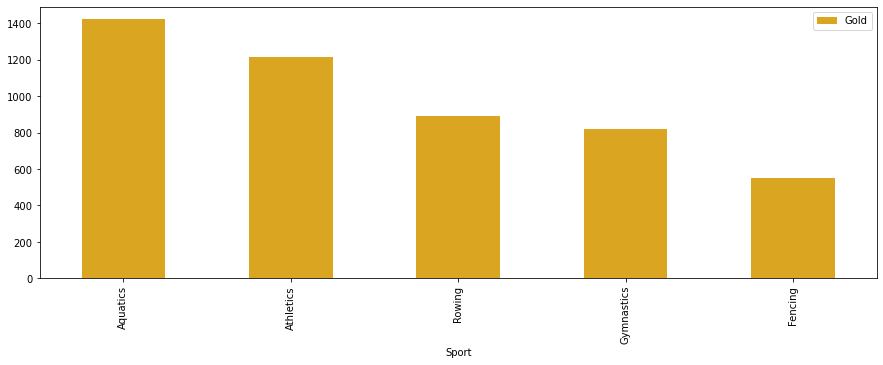

In [20]:
gold=df.query('Medal=="Gold"')   # here this will return a dataset with medals column having only GOLD medals
data = []

for sport in gold['Sport'].unique(): # now from DataSet of Only Gold we will search for each unique sport
    data.append([sport , len(gold[gold['Sport']  == sport])])
    
pd.DataFrame(data,columns = ['Sport','Gold']).sort_values(by='Gold', ascending=False).head().plot(x = 'Sport', y = 'Gold', kind = 'bar',color='GoldenRod', figsize = (15,5))


# Above line sorts the sports having most Medals in descending order
#Since we already obtained dataset having only gold medal in "gold"dataset we will obtain sports having gold medals in descending order

##  3. Which sport is having most number of medals so far? (Top 5)

<AxesSubplot:xlabel='Sport'>

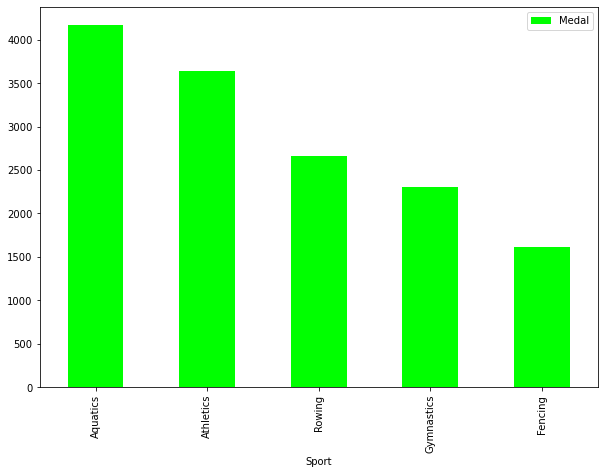

In [21]:
data = []

for sport in df['Sport'].unique():
    data.append([sport , len(df[df['Sport']  == sport])])
pd.DataFrame(data,columns = ['Sport','Medal']).sort_values(by='Medal', ascending=False).head().plot(x = 'Sport', y = 'Medal', kind = 'bar',color='Lime' ,figsize = (10,7))

# 4. Which player has won most number of medals? (Top 5)

### Data

In [22]:
df.groupby('Athlete').count()['Medal'].sort_values(ascending=False).head()

Athlete
PHELPS, Michael         22
LATYNINA, Larisa        18
ANDRIANOV, Nikolay      15
MANGIAROTTI, Edoardo    13
ONO, Takashi            13
Name: Medal, dtype: int64

### Graph

<AxesSubplot:xlabel='Athlete'>

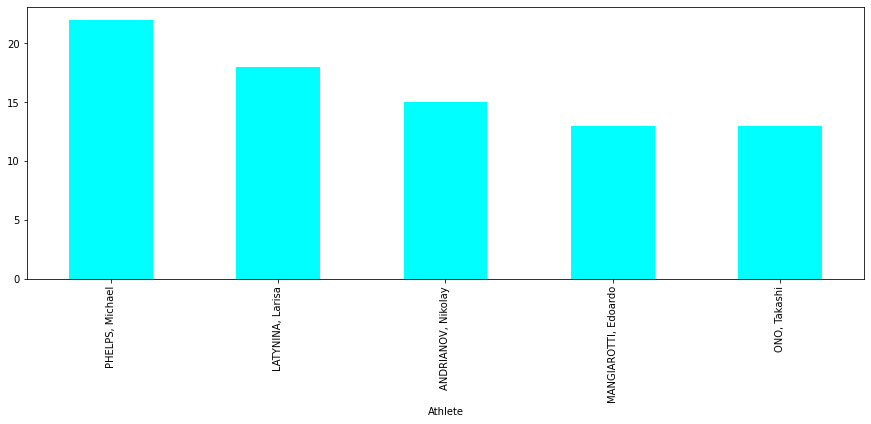

In [23]:
df.groupby('Athlete').count()['Medal'].sort_values(ascending=False).head().plot.bar(color='Cyan',figsize=(15,5))

# 5. Which player has won most number Gold Medals of medals? (Top 5)

### data

In [24]:
df[df['Medal']=='Gold'].groupby('Athlete').count()['Medal'].sort_values(ascending=False).head()

Athlete
PHELPS, Michael     18
LEWIS, Carl          9
NURMI, Paavo         9
SPITZ, Mark          9
LATYNINA, Larisa     9
Name: Medal, dtype: int64

###  Graph

<AxesSubplot:xlabel='Athlete'>

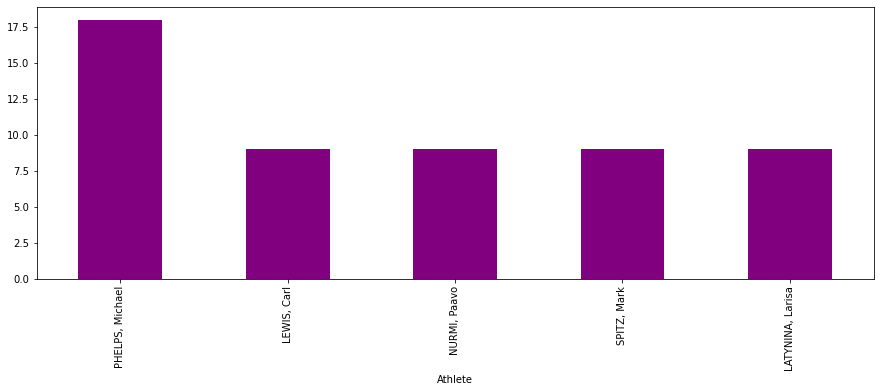

In [25]:
df[df['Medal']=='Gold'].groupby('Athlete').count()['Medal'].sort_values(ascending=False).head().plot.bar(color='Purple',figsize=(15,5))

# 6. In which year India won first Gold Medal in Summer Olympics?

In [26]:
d=df[(df.Medal=='Gold')]
ind=d[(d.Country=='IND')]
data=[]
for year in ind['Year'].unique():
    data.append([year,len(ind[ind['Year']==year])])
print("First Time India won Gold in Olympics in the year:")
print(data[0])
#pd.DataFrame(data).sort_values(by='Year', ascending=True).head()
pd.DataFrame(data,columns= ['Year',' GoldMedals']).sort_values(by='Year', ascending=True).head(1)



First Time India won Gold in Olympics in the year:
[1928, 15]


,Year,GoldMedals
0,1928,15


### India's Medal Trends(Extra Information)

India's medal trend in olympics So far:


<AxesSubplot:xlabel='Year'>

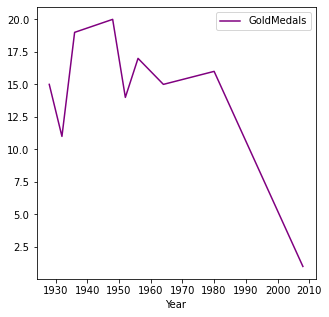

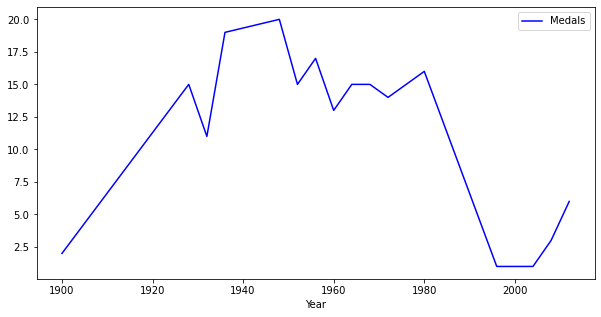

In [27]:
d=df[(df.Medal=='Gold')]
ind=d[(d.Country=='IND')]
data=[]
for year in ind['Year'].unique():
    data.append([year,len(ind[ind['Year']==year])])
# this shows trend Goldmedal
pd.DataFrame(data,columns= ['Year','GoldMedals']).sort_values(by='Year', ascending=True).plot(x = 'Year', y = 'GoldMedals', kind = 'line',color='Purple', figsize = (5,5))



ind=df[(df.Country=='IND')]
data=[]
for year in ind['Year'].unique():
    data.append([year,len(ind[ind['Year']==year])])
print("India's medal trend in olympics So far:")
# this shows trend Goldmedal
pd.DataFrame(data,columns= ['Year','Medals']).sort_values(by='Year', ascending=True).plot(x = 'Year', y = 'Medals', kind = 'line',color='Blue', figsize = (10,5))



# 7. Which event is most popular in terms on number of players? (Top 5)

<AxesSubplot:xlabel='Event'>

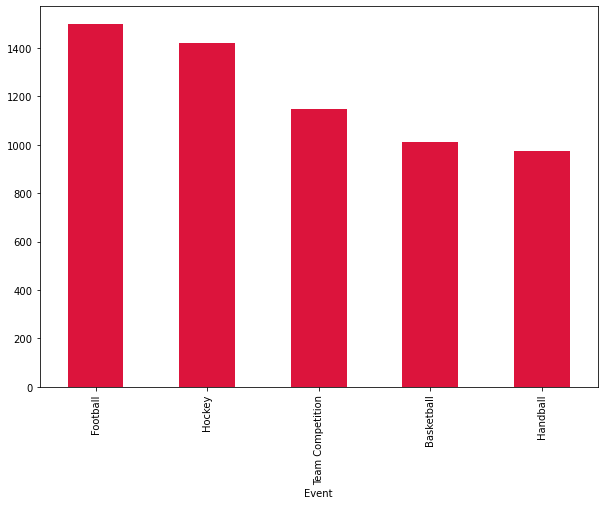

In [28]:
df.groupby('Event').count()['Athlete'].sort_values(ascending=False).head().plot.bar(color='Crimson',figsize=(10,7))

# 8. Which sport is having most female Gold Medalists? (Top 5)

<AxesSubplot:xlabel='Sport'>

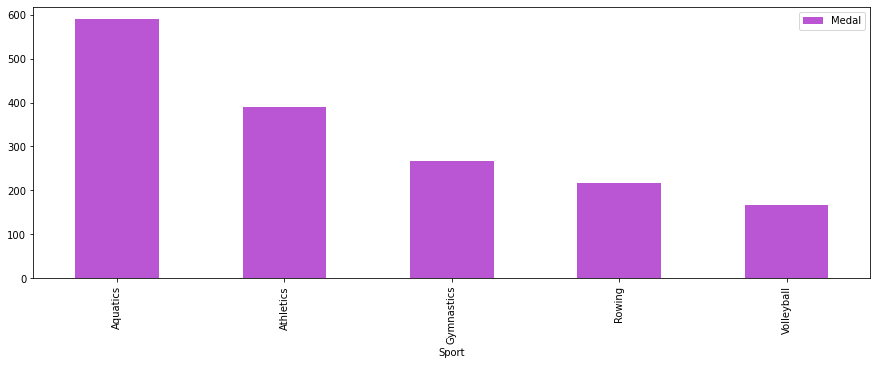

In [29]:
d=df[(df.Medal=='Gold')]
fem=d[(d.Gender=='Women')]
data=[]
for sport in fem['Sport'].unique():
    data.append([sport,len(fem[fem['Sport']==sport])])
# this shows trend Goldmedal
pd.DataFrame(data,columns= ['Sport','Medal']).sort_values(by='Medal', ascending=False).head().plot(x = 'Sport', y = 'Medal', kind = 'bar',color='MediumOrchid', figsize = (15,5))
